<a href="https://colab.research.google.com/github/tito631227/Test/blob/master/SVC_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()

In [ ]:
print(digits.data)
print(f"次元：{digits.data.ndim}")

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
次元：2


In [ ]:
print(digits.data.shape)

(1797, 64)


In [ ]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [ ]:
digits.images[2]

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

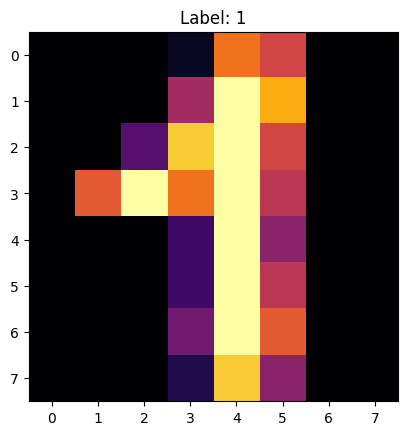

In [ ]:
import matplotlib.pyplot as plt

plt.gray()  # グレースケール
plt.imshow(digits.images[47], cmap='inferno', interpolation='nearest')
plt.title(f"Label: {digits.target[47]}")
plt.show()

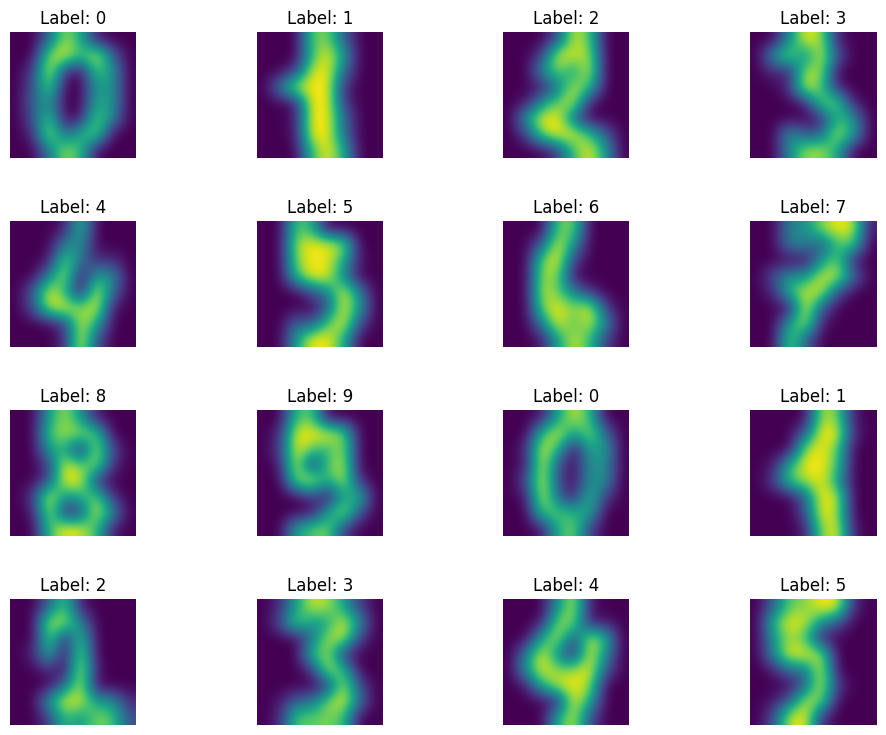

In [ ]:
import numpy as np

ROWS_COUNT = 4
COLUMNS_COUNT = 4
DIGIT_GRAPH_COUNT = ROWS_COUNT * COLUMNS_COUNT

subfig = []

x = np.linspace(-1, 1, 10)

fig = plt.figure(figsize=(12, 9))

for i in range(DIGIT_GRAPH_COUNT):
  subfig.append(fig.add_subplot(ROWS_COUNT, COLUMNS_COUNT, i + 1))
  subfig[i].imshow(digits.images[i],interpolation='bicubic', cmap='viridis')
  subfig[i].set_title(f"Label: {digits.target[i]}")
  subfig[i].axis('off')

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [ ]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

digits = datasets.load_digits()

all_features = digits.data
teacher_labels = digits.target

In [ ]:
pca = decomposition.PCA(n_components=3)
three_features = pca.fit_transform(all_features)

In [ ]:
def getcolor(color):
  if color == 0:
    return 'red'
  elif color == 1:
    return 'orange'
  elif color == 2:
    return 'yellow'
  elif color == 3:
    return 'greenyellow'
  elif color == 4:
    return 'green'
  elif color == 5:
    return 'cyan'
  elif color == 6:
    return 'blue'
  elif color == 7:
    return 'purple'
  elif color == 8:
    return 'pink'
  else:
    return 'black'




fig = plt.figure(figsize=(12, 9))
subfig = fig.add_subplot(111, projection = '3d')
colors = list(map(getcolor, teacher_labels))

subfig.scatter(
    three_features[ : , 0 ],
    three_features[ : , 1 ],
    three_features[ : , 2 ],
    s=50,
    c=colors,
    alpha=0.3)

plt.show

In [ ]:
from sklearn import svm, metrics
images_and_labels = list(zip(digits.images, digits.target))
print('教師データ：', digits.target)

教師データ： [0 1 2 ... 8 9 8]


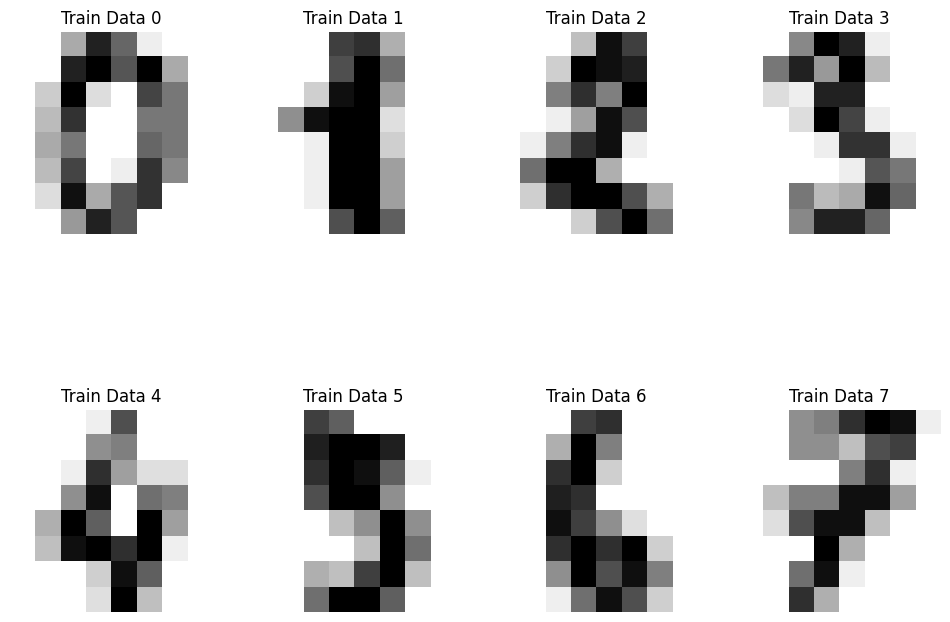

In [ ]:
fig = plt.figure(figsize=(12, 9))

for index, (image, label) in enumerate(images_and_labels[ : 8 ]):
  plt.subplot(2, 4, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r)
  plt.title('Train Data %i' % label)

plt.show()

In [ ]:
num_samples = len(digits.images)
print(num_samples)

1797


In [ ]:
print(digits.images.shape)

(1797, 8, 8)


In [ ]:
data = digits.images.reshape((num_samples, -1))

import sklearn.svm as svm

In [ ]:
print(data.shape)

(1797, 64)


In [ ]:
model = svm.SVC(gamma = 0.001)

train_features=digits.data[ : num_samples // 2 ]
train_teacher_labels=digits.target[ : num_samples //2 ]

test_feature=data[num_samples //2 : ]
test_teacher_labels=digits.target[num_samples // 2 : ]

model.fit(train_features,train_teacher_labels)

SVC(gamma=0.001)

In [ ]:
expected = test_teacher_labels
predicted = model.predict(test_features)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("分類器が分類した結果 %s: \n %s \n" % (model, classification_report(expected, predicted)))
print("コンフュージョンマトリックス:\n %s" % confusion_matrix(expected, predicted))

分類器が分類した結果 SVC(gamma=0.001): 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899
 

コンフュージョンマトリックス:
 [[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12505 (\N{KATAKANA LETTER BE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

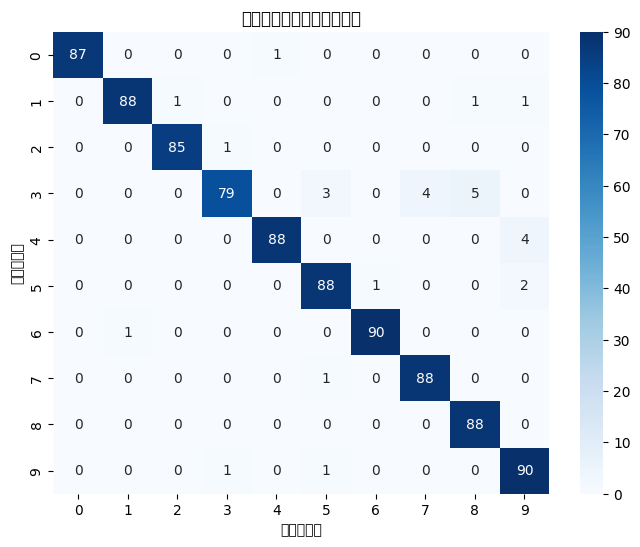

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(expected, predicted)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("予測ラベル")
plt.ylabel("正解ラベル")
plt.title("混同行列（ヒートマップ）")
plt.show()

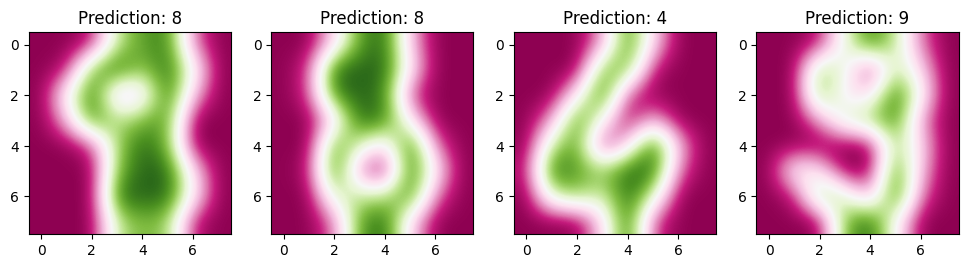

In [ ]:
fig = plt.figure(figsize=(12, 9))

digits_and_predictions = list(zip(digits.images[num_samples // 2 : ], predicted))
for index, (image, prediction) in enumerate(digits_and_predictions[ : 4 ]):
  plt.subplot(2, 4, index + 5)
  plt.imshow(image, cmap='PiYG', interpolation='bicubic')
  plt.title('Prediction: %i' % prediction)

plt.show()